In [22]:
import os
import json
import re

import matplotlib.pyplot as plt
import numpy as np

LOG_PATH = '/home/kevin/Custom-RT-DETR/rtdetr_pytorch/tools/train_log_parsed_json.txt'
OUTPUT_DIR = 'graphs_output_rtdetr_r50'
if not os.path.isdir(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)


### Read the log file

In [23]:
epoch_logs = []
with open(LOG_PATH, 'r') as log_file:
    log_content = log_file.read().split('\n')
    for i, line in enumerate(log_content):
        if re.match(r'^[\s]*$', line):
            continue
        epoch_logs.append(json.loads(line))

epoch_logs = epoch_logs*10
print('total epochs:', len(epoch_logs))

total epochs: 100


### Train losses

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


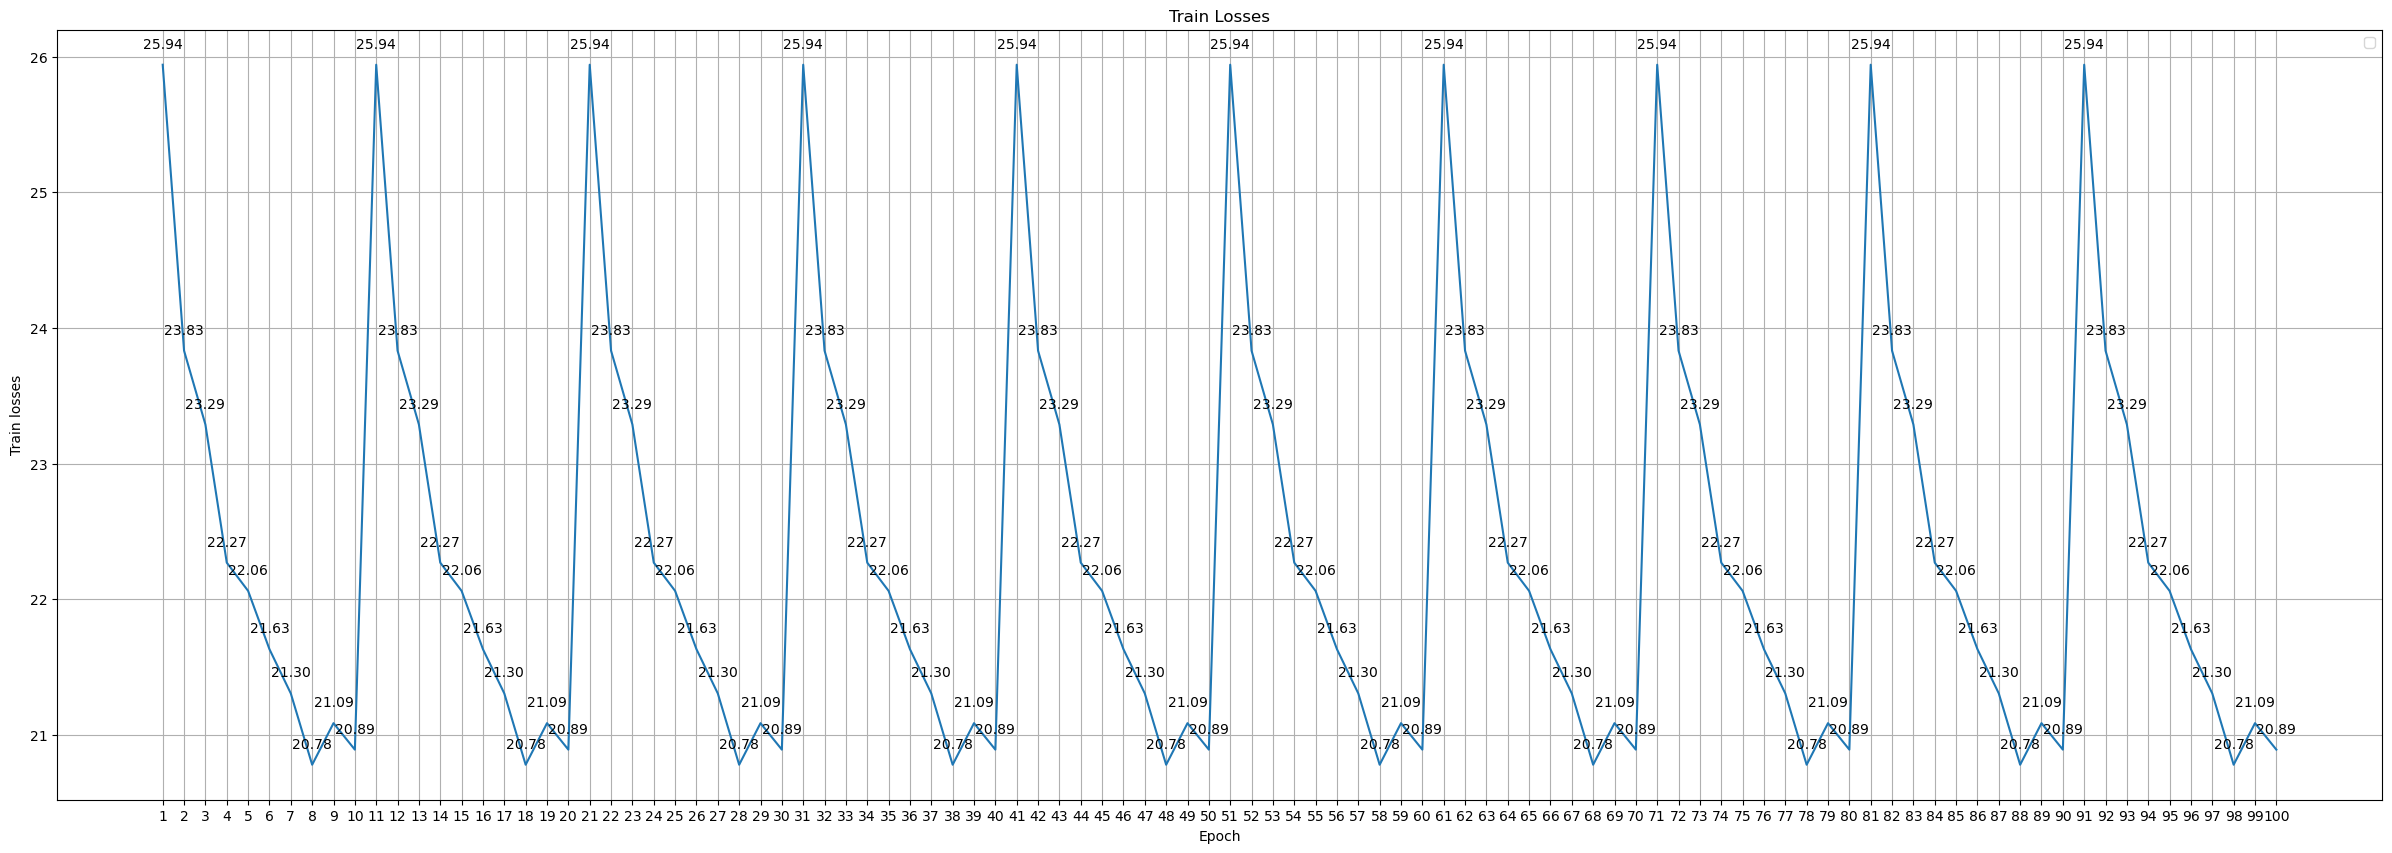

In [24]:
# Sample data (can be replaced with your actual data)
x = list(range(1, len(epoch_logs)+1)) 
y = [i['train_loss'] for i in epoch_logs]  

plt.figure(figsize=( 3*(int(len(x)/ (10 if len(x)>10 else len(x)))), 2*(int(len(y)/ (20 if len(y)>20 else len(y))))))

# Create the plot
plt.xticks(x, [f"{int(i)}" for i in x])
plt.plot(x, y)  # Plot line 1 with label

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Train losses')
plt.title('Train Losses')

# Add legend
plt.legend()

for i, (xi, yi) in enumerate(zip(x, y)):
  plt.text(xi, yi + 0.1, f"{yi:.2f}", ha='center', va='bottom')

# Show the plot
plt.grid(True)  # Add gridlines for better readability (optional)
plt.savefig(os.path.join(OUTPUT_DIR, 'train_losses.png'))
plt.show()



### AP vals

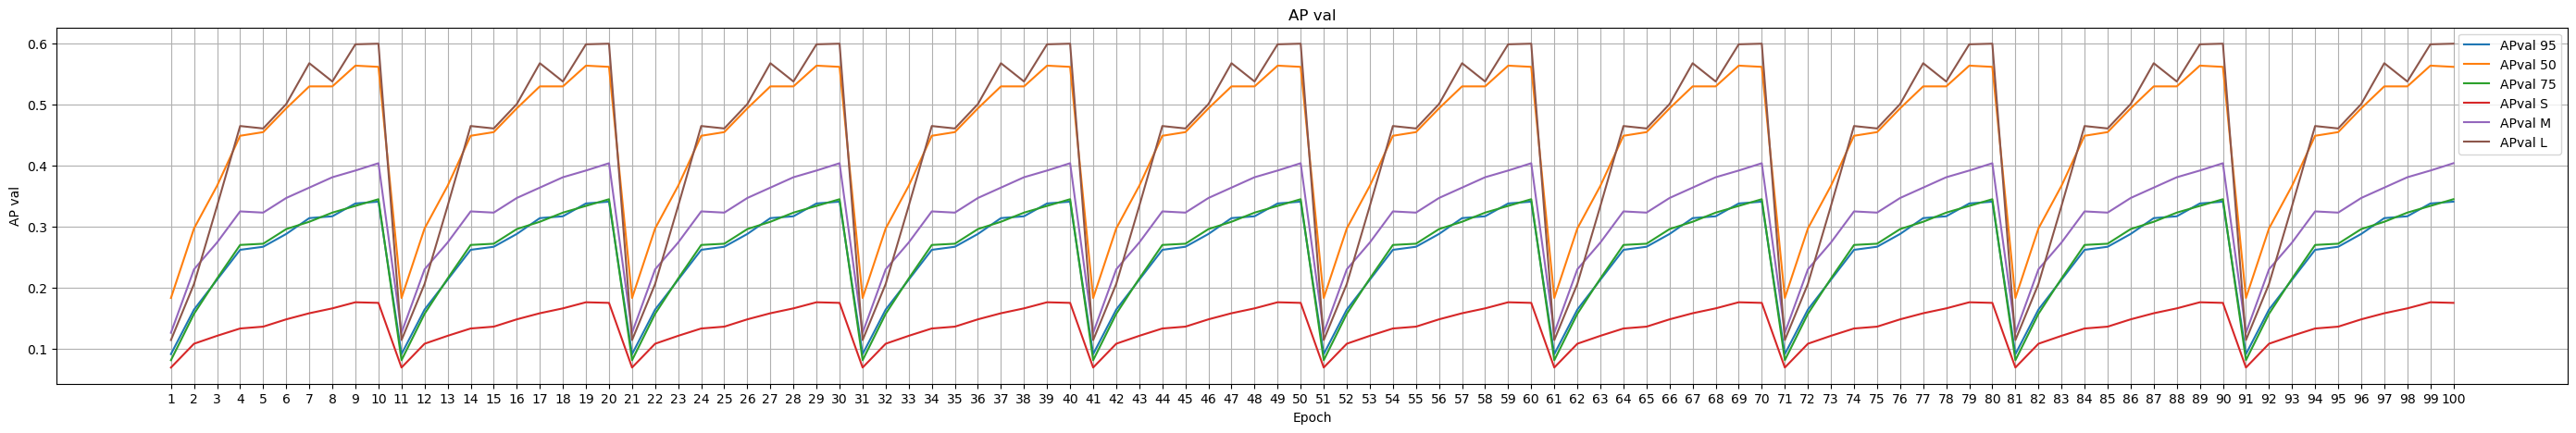

In [25]:
# Sample data (can be replaced with your actual data)
x = list(range(1, len(epoch_logs)+1))
ap_labels = ['APval 95', 'APval 50', 'APval 75', 'APval S', 'APval M', 'APval L']
all_ys = {
    k:[ep['test_coco_eval_bbox'][i] for ep in epoch_logs] for i, k in enumerate(ap_labels)
}

y_len = len(epoch_logs[0]['test_coco_eval_bbox'])
plt.figure(figsize=( 5+3*(int(len(x)/ (10 if len(x)>10 else len(x)))), 3+2*(int(y_len/ (20 if y_len>20 else y_len)))))

for label, y in all_ys.items():
    plt.xticks(x, [f"{int(i)}" for i in x])  # Format tick labels (optional)
    plt.plot(x, y, label=label)  # Plot line 1 with label

# for lab, y in all_ys.items():
#     for i, (xi, yi) in enumerate(zip(x, y)):
#       plt.text(xi, yi + 0.1, f"{yi:.2f}", ha='center', va='bottom')


# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('AP val')
plt.title('AP val')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Add gridlines for better readability (optional)
plt.savefig(os.path.join(OUTPUT_DIR, 'ap_val.png'))
plt.show()


### Example

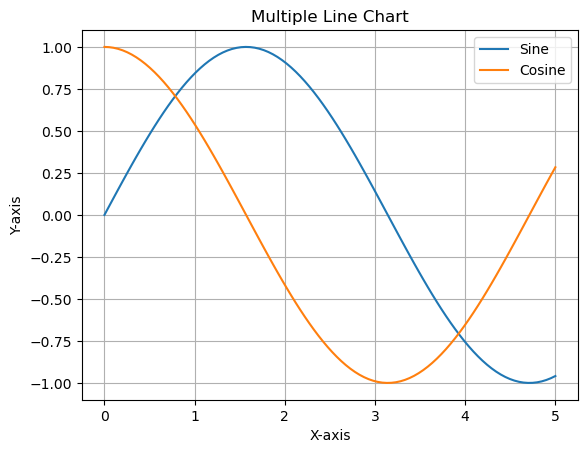

In [26]:

# Sample data (can be replaced with your actual data)
x = np.linspace(0, 5, 100)  # Create x-axis values (evenly spaced)
y1 = np.sin(x)  # Sample data for line 1 (sine wave)
y2 = np.cos(x)  # Sample data for line 2 (cosine wave)

# Create the plot
plt.plot(x, y1, label='Sine')  # Plot line 1 with label
plt.plot(x, y2, label='Cosine')  # Plot line 2 with label

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Line Chart')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()
